In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import style
style.use("fivethirtyeight")

In [2]:
dataset=pd.read_csv("full.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [3]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Age_wiki,887.0,29.322063,13.930089,0.42,20.0000,28.0000,38.0,74.0000
Class,889.0,2.307087,0.837713,1.00,2.0000,3.0000,3.0,3.0000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Name_wiki      889 non-null object
Age_wiki       887 non-null float64
Hometown       889 non-null object
Boarded        889 non-null object
Destination    889 non-null object
Lifeboat       345 non-null object
Body           87 non-null object
Class          889 non-null float64
dtypes: float64(4), int64(5), object(11)
memory usage: 139.3+ KB


In [5]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Name_wiki        2
Age_wiki         4
Hometown         2
Boarded          2
Destination      2
Lifeboat       546
Body           804
Class            2
dtype: int64

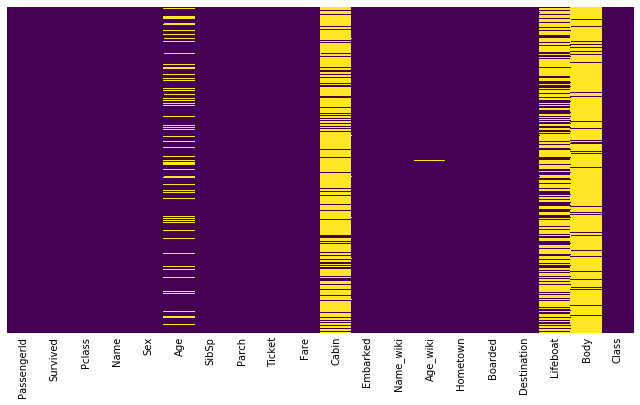

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
dataset.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_wiki,Class
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.043758,-0.032103
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.049798,-0.341829
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.392663,0.998398
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.984805,-0.368029
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.298777,0.083070
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.191864,0.019313
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.120400,-0.545651
Age_wiki,0.043758,-0.049798,-0.392663,0.984805,-0.298777,-0.191864,0.120400,1.000000,-0.391484
Class,-0.032103,-0.341829,0.998398,-0.368029,0.083070,0.019313,-0.545651,-0.391484,1.000000


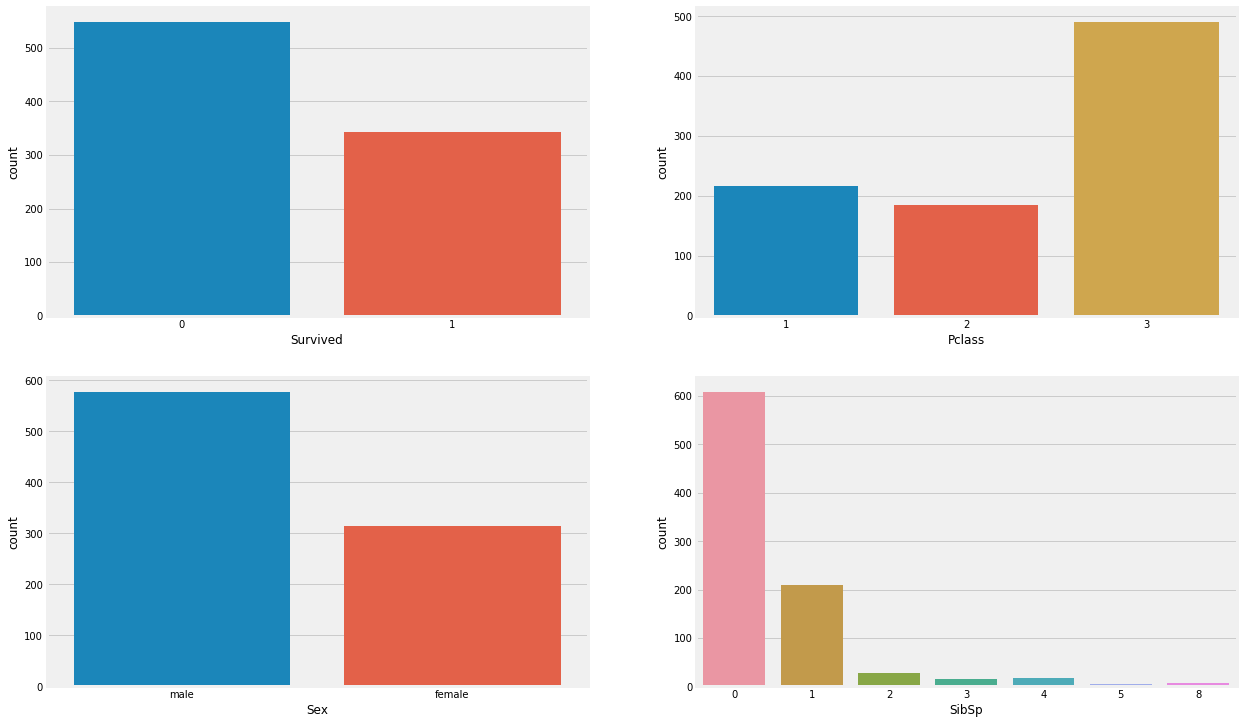

In [8]:
ax=plt.figure(figsize=(19,12.5))
ax.add_subplot(2,2,1)
sns.countplot(dataset["Survived"])
ax.add_subplot(2,2,2)
sns.countplot(dataset["Pclass"])
ax.add_subplot(2,2,3)
sns.countplot(dataset["Sex"])
ax.add_subplot(2,2,4)
sns.countplot(dataset["SibSp"])

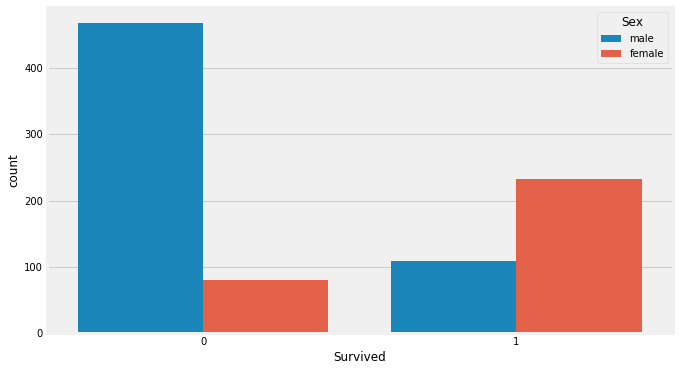

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(dataset['Survived'],hue=dataset['Sex'])

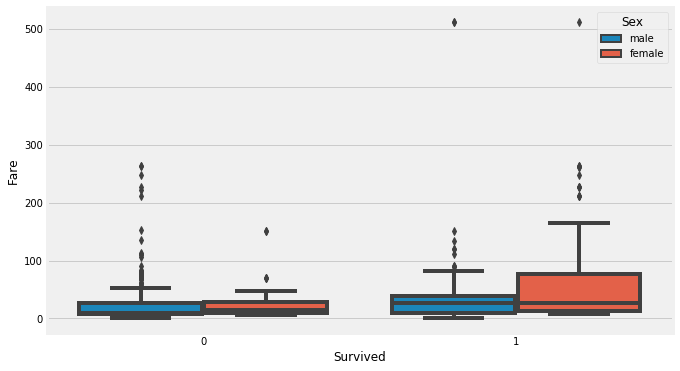

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Survived",y="Fare",hue="Sex",data=dataset)

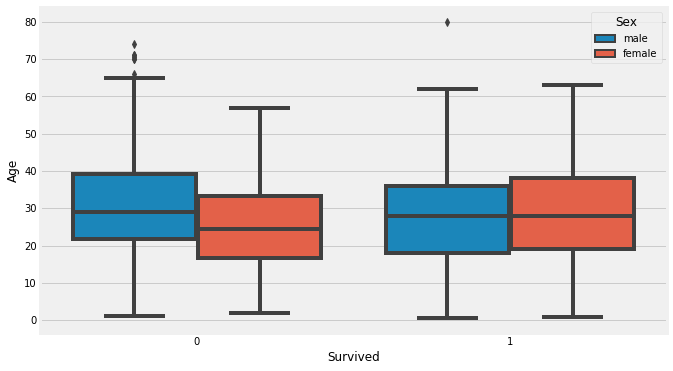

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Survived",y="Age",hue="Sex",data=dataset)

In [12]:
from collections import Counter
b=Counter(dataset["Boarded"])
b

Counter({'Southampton': 638,
         'Cherbourg': 166,
         'Queenstown': 76,
         'Belfast': 9,
         nan: 2})

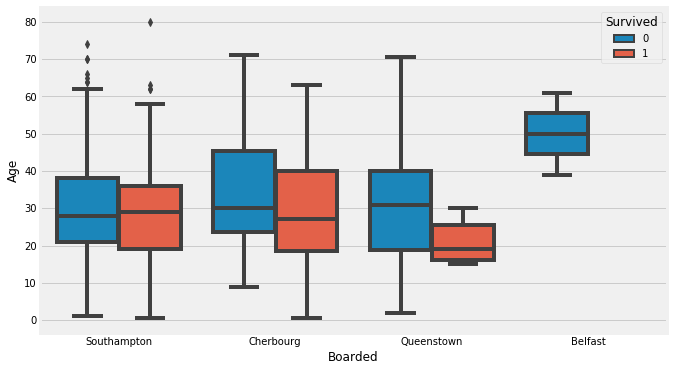

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Boarded",y="Age",data=dataset,hue="Survived")

In [14]:
e=Counter(dataset["Embarked"])

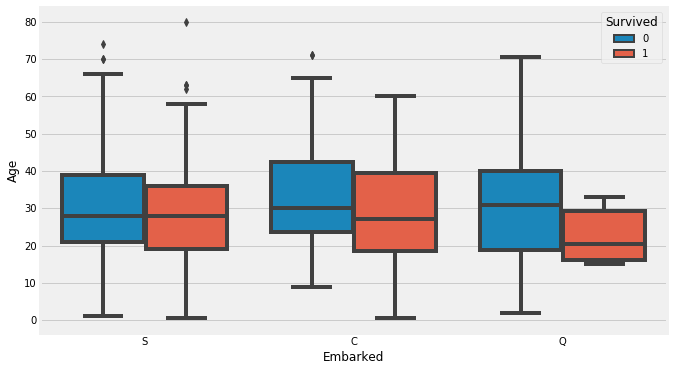

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Embarked",y="Age",data=dataset,hue="Survived")

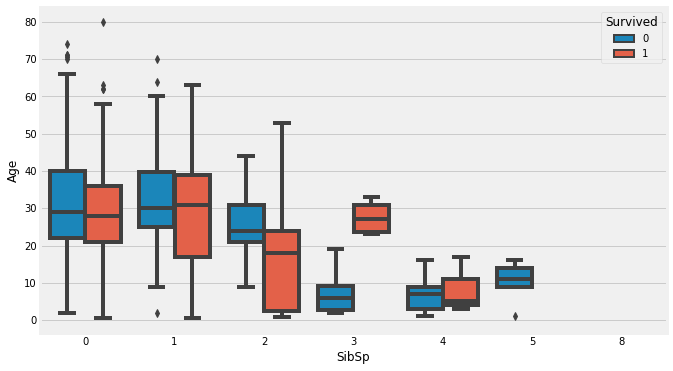

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x="SibSp",y="Age",data=dataset,hue="Survived")

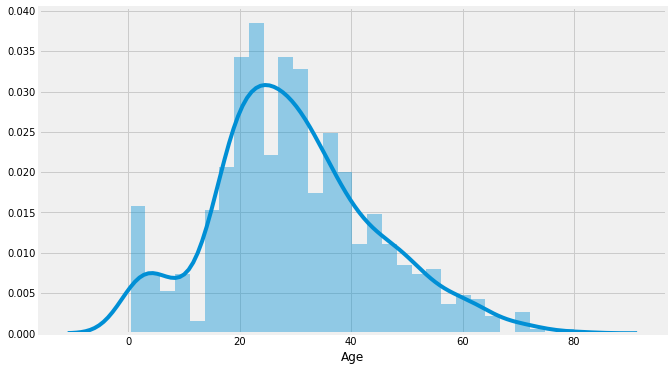

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(dataset['Age'].dropna(),bins=30)

In [18]:
dataset.drop(['Cabin','Body','Name_wiki','Destination','Lifeboat',
                      'Class','Age_wiki','Hometown',"Ticket","Name"],axis=1,inplace=True)

In [19]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Boarded
0,1,0,3,male,22.0,1,0,7.2500,S,Southampton
1,2,1,1,female,38.0,1,0,71.2833,C,Cherbourg
2,3,1,3,female,26.0,0,0,7.9250,S,Southampton
3,4,1,1,female,35.0,1,0,53.1000,S,Southampton
4,5,0,3,male,35.0,0,0,8.0500,S,Southampton


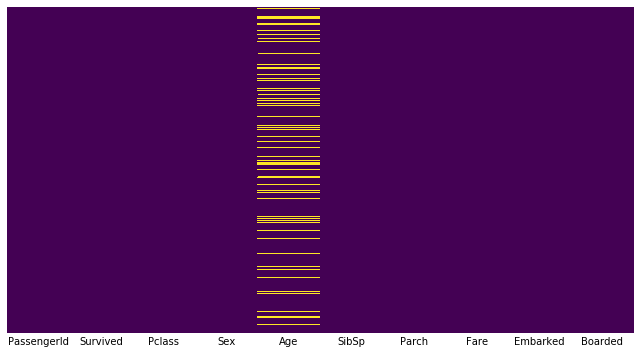

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

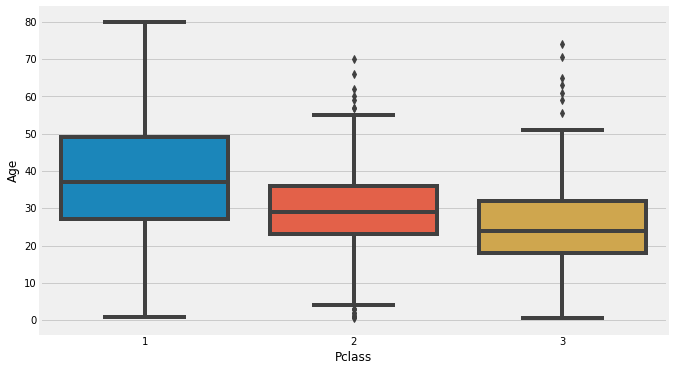

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Pclass",y="Age",data=dataset)

In [22]:
def imputing(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        elif Pclass==3:
            return 24
    else:
        return Age

In [23]:
dataset["Age"]=dataset[["Age","Pclass"]].apply(imputing,axis=1)

In [24]:
dataset.dropna(inplace=True)

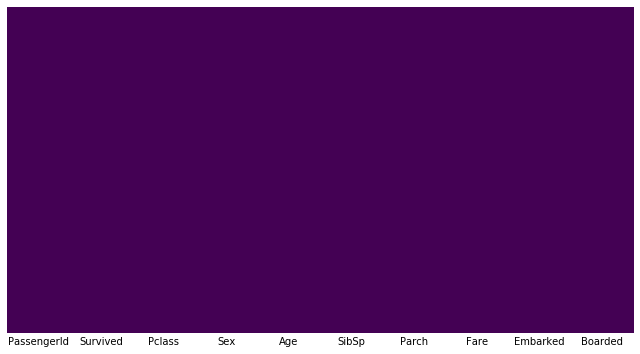

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Boarded
0,1,0,3,male,22.0,1,0,7.2500,S,Southampton
1,2,1,1,female,38.0,1,0,71.2833,C,Cherbourg
2,3,1,3,female,26.0,0,0,7.9250,S,Southampton
3,4,1,1,female,35.0,1,0,53.1000,S,Southampton
4,5,0,3,male,35.0,0,0,8.0500,S,Southampton


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
encoder=LabelEncoder()
dataset["Sex"]=encoder.fit_transform(dataset["Sex"])
dataset["SibSp"]=encoder.fit_transform(dataset["SibSp"])
dataset["Embarked"]=encoder.fit_transform(dataset["Embarked"])
dataset["Boarded"]=encoder.fit_transform(dataset["Boarded"])

In [29]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Boarded
0,1,0,3,1,22.0,1,0,7.2500,2,3
1,2,1,1,0,38.0,1,0,71.2833,0,1
2,3,1,3,0,26.0,0,0,7.9250,2,3
3,4,1,1,0,35.0,1,0,53.1000,2,3
4,5,0,3,1,35.0,0,0,8.0500,2,3


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [31]:
x=dataset.drop(["Survived"],axis=1)
y=dataset["Survived"]

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6)

In [33]:
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)

In [34]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[119  13]
 [ 26  64]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       132
           1       0.83      0.71      0.77        90

    accuracy                           0.82       222
   macro avg       0.83      0.81      0.81       222
weighted avg       0.82      0.82      0.82       222

0.8243243243243243


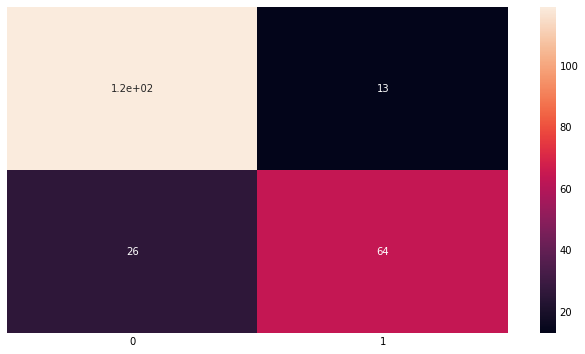

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred),yticklabels=False,annot=True)